In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import spearmanr
from scipy import stats

In [3]:
# Read data using Pandas from the UCI data repository.
feature_names = ["X1", "X2", "X3", "X4","X5", "X6","X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14","X15", "X16","X17", "X18", "X19", "X20", "X21", "X22", "X23", "Y"]
X = pd.read_csv("p2_mod.csv", header=0, names=feature_names)
y = X["Y"]                      # Select target label
X.drop(['Y'], axis=1, inplace=True)   # Remove target label from dataset
display(X.head())   

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [4]:
print(X)
print(y)

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X14    X15    X16  \
0       20000   2   2   1  24   2   2  -1  -1   -2  ...     689      0      0   
1      120000   2   2   2  26  -1   2   0   0    0  ...    2682   3272   3455   
2       90000   2   2   2  34   0   0   0   0    0  ...   13559  14331  14948   
3       50000   2   2   1  37   0   0   0   0    0  ...   49291  28314  28959   
4       50000   1   2   1  57  -1   0  -1   0    0  ...   35835  20940  19146   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...    ...   
29995  220000   1   3   1  39   0   0   0   0    0  ...  208365  88004  31237   
29996  150000   1   3   2  43  -1  -1  -1  -1    0  ...    3502   8979   5190   
29997   30000   1   2   2  37   4   3   2  -1    0  ...    2758  20878  20582   
29998   80000   1   3   1  41   1  -1   0   0    0  ...   76304  52774  11855   
29999   50000   1   2   1  46   0   0   0   0    0  ...   49764  36535  32428   

         X17    X18    X19 

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
clf= DecisionTreeClassifier()

In [7]:
clf.fit(X,y)

DecisionTreeClassifier()

[Text(254.19258868355675, 215.07652173913044, 'X6 <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(202.86730782130135, 210.3495652173913, 'X7 <= 1.5\ngini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(128.24489605905606, 205.62260869565216, 'X20 <= 678.5\ngini = 0.245\nsamples = 24599\nvalue = [21085, 3514]'),
 Text(55.52547026105753, 200.89565217391305, 'X12 <= 530.0\ngini = 0.339\nsamples = 6776\nvalue = [5312, 1464]'),
 Text(29.685272012958542, 196.1686956521739, 'X21 <= 3.5\ngini = 0.4\nsamples = 2664\nvalue = [1929, 735]'),
 Text(21.290555861206773, 191.44173913043477, 'X5 <= 55.5\ngini = 0.427\nsamples = 1645\nvalue = [1136, 509]'),
 Text(12.522269527883545, 186.71478260869566, 'X1 <= 25000.0\ngini = 0.419\nsamples = 1583\nvalue = [1111, 472]'),
 Text(1.6178256271911304, 181.98782608695652, 'X13 <= 102.0\ngini = 0.499\nsamples = 75\nvalue = [39, 36]'),
 Text(1.1572767260199326, 177.26086956521738, 'X17 <= 651.0\ngini = 0.493\nsamples = 52\nvalue = 

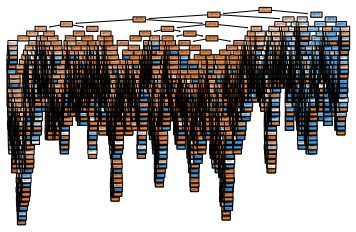

In [8]:
from sklearn import tree
tree.plot_tree(clf, filled=True,rounded=True, feature_names=X.columns)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 0, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on Test Set: ")
    print(accuracy_score(y_test,y_pred)*100)

In [17]:
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on Test Set: 
81.51666666666667


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(X_train, y_train)
# knn.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = classifier.score(X_test,y_test)
print("KNN Algorithm Score:", score*100)

KNN Algorithm Score: 80.95


In [20]:
# using decision tree
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train,y_train)
i=dclf.score(X_train,y_train)
dt_score=dclf.score(X_test,y_test)*100
print("Decision Tree Accuracy:", dt_score)

Decision Tree Accuracy: 72.76666666666667


In [21]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
lr = model.score(X_test, y_test)*100
print("LogisticRegression Accuracy:", lr)

LogisticRegression Accuracy: 80.98333333333333


In [22]:
#SVM
from sklearn import svm
from sklearn.svm import SVC
vm = svm.SVC()
vm.fit(X_train, y_train)
svm_score = vm.score(X_test, y_test)*100
print("SVM Accuracy:", svm_score)

SVM Accuracy: 81.93333333333334


In [23]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bng = BernoulliNB()
bng.fit(X_train, y_train)
nb_score = bng.score(X_test, y_test)*100
print("Naive Bayes Accuracy:", nb_score)

Naive Bayes Accuracy: 67.7


In [24]:
#Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_score = mlp.score(X_test, y_test)*100
print("Multi Layer Perceptron Accuracy:", mlp_score)

Multi Layer Perceptron Accuracy: 81.66666666666667


F:\Anaconda_Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
